Exploratory SP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.fft import fft, ifft


In [3]:
def fftPlot(y):
    
    # get the list of frequencies
    frequency = np.linspace(0,1,np.size(y))

    # get the list of spectrums
    spectrum=abs(fft(y))**2
    normalized_spectrum=spectrum/spectrum[0]

    # plot nspectrum per frequency, with a semilog scale on nspectrum
    plt.semilogy(frequency,normalized_spectrum,marker='o',linewidth='2',color='k')

In [4]:
def decompPlot(df, col):
    
    y = df[col]
    
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(y, model='multiplicative', period=28)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(y, model='additive', period=28)

    # Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

In [5]:
def sleepTrendPlot(df, columns, period = 28):
    
#     fig, axs = plt.subplots(2, 2)
    for index, col in enumerate(columns):
        DecomposeResults = seasonal_decompose(df[col], model='multiplicative', period=28)
        ax = plt.subplot(2, 2, index + 1)
#         axs[index] = plt.plot(DecomposeResults.trend)
        plt.plot(DecomposeResults.trend)
#         plt.suptitle(col)
        

        # chart formatting
        ax.set_title(col)
#         ax.get_legend().remove()
        ax.set_xlabel("")  

In [6]:
def newNameColumn(column_name):
    return column_name.lower().split()[0]

In [10]:
def newNameColumn2(column_name):
    new_name = [column_name.lower().split()[0],column_name.lower().split()[1]]
    new_name = '_'.join(new_name)
    return new_name

In [24]:
def renameAllColumns(df):
    df_columns = df.columns
    updated_cols = [newNameColumn2(col) for col in df_columns[0:9]]
    updated_cols.extend([newNameColumn(col) for col in df_columns[9:13]])
    updated_cols.extend([newNameColumn2(col) for col in df_columns[13:16]])
    updated_cols.extend([newNameColumn(col) for col in df_columns[16::]])
    
    return {key: value for key, value in zip(df_columns, updated_cols)}

In [7]:
def renameSleepColumns(df_columns):
    updated_cols = [newNameColumn(col) for col in df_columns]
    return {key: value for key, value in zip(df_columns, updated_cols)}
    

In [38]:
def addPercentageColumns(df):
    cols = df.columns[9:13]
    for col in cols:
        df['_'.join([col,'percentage'])] = df[col]/df['in_bed']*100
    return df

def sleepPercentagePlot(df):
    
    df = addPercentageColumns(df)
    df.iloc[:,17::].plot(kind = 'bar', stacked = True)

    plt.axis('off')

    plt.show()


def sleepMeanPercentagePlot(df):
    
    df = addPercentageColumns(df)
    sns.barplot(df.iloc[:,17::])
    plt.show()
    print(df.iloc[:,17::].mean(axis = 0))
    print(df.iloc[:,17::].std(axis = 0))
    print(df.iloc[:,17::].std(axis = 0)/df.iloc[:,17::].mean(axis = 0))

In [26]:
# read the sheet containing workout information excluding the comments, name of routine, and duration
df = pd.read_csv("sleeps.csv")

# rename columns to make them easier to work with
df = df.rename(columns=renameAllColumns(df))


In [39]:
df2 =  addPercentageColumns(df)


/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_74146/3704481136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_'.join([col,'percentage'])] = df[col]/df['in_bed']*100
/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_74146/3704481136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_'.join([col,'percentage'])] = df[col]/df['in_bed']*100
/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_74146/3704481136.py:4: SettingWithCopyWarning: 
A value is trying to be set o

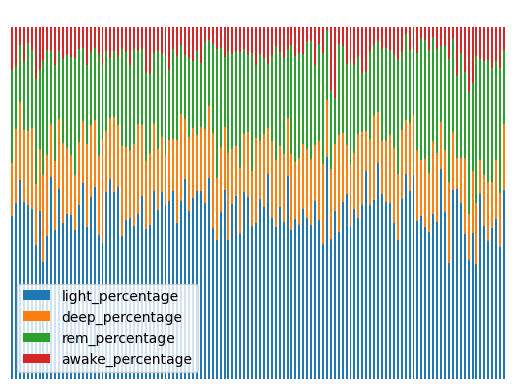

light_percentage    47.843054
deep_percentage     18.780707
rem_percentage      25.311379
awake_percentage     8.064860
dtype: float64
light_percentage    6.182920
deep_percentage     3.518581
rem_percentage      5.229864
awake_percentage    3.168043
dtype: float64
light_percentage    0.129233
deep_percentage     0.187351
rem_percentage      0.206621
awake_percentage    0.392821
dtype: float64


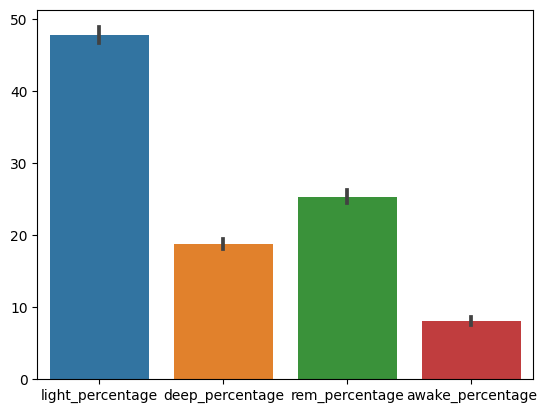

In [65]:
df.iloc[:,17::].plot(kind = 'bar', stacked = True)

plt.axis('off')

plt.show()

plt.figure()

sns.barplot(df.iloc[:,17::])

print(df.iloc[:,17::].mean(axis = 0))
print(df.iloc[:,17::].std(axis = 0))
print(df.iloc[:,17::].std(axis = 0)/df.iloc[:,17::].mean(axis = 0))

In [66]:
# check for NA values
print(df.info())

# check the formatting for Sleep onset and Wake onset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 1 to 126
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_start        126 non-null    object 
 1   cycle_end          126 non-null    object 
 2   cycle_timezone     126 non-null    object 
 3   sleep_onset        126 non-null    object 
 4   wake_onset         126 non-null    object 
 5   sleep_performance  126 non-null    int64  
 6   respiratory_rate   126 non-null    float64
 7   asleep_duration    126 non-null    int64  
 8   in_bed             126 non-null    int64  
 9   light              126 non-null    int64  
 10  deep               126 non-null    int64  
 11  rem                126 non-null    int64  
 12  awake              126 non-null    int64  
 13  sleep_need         126 non-null    int64  
 14  sleep_debt         126 non-null    int64  
 15  sleep_efficiency   126 non-null    int64  
 16  nap                126 non

In [32]:
df = df.dropna()

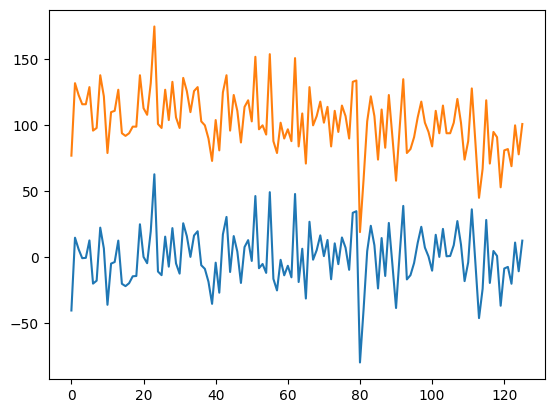

In [33]:
detrended = signal.detrend(df['deep'].values)
plt.plot(detrended)
plt.plot(df['deep'].values)

In [34]:
df.describe()

,sleep_performance,respiratory_rate,asleep_duration,in_bed,light,deep,rem,awake,sleep_need,sleep_debt,sleep_efficiency
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,98.349206,13.504762,502.896825,547.142857,261.293651,102.976190,138.626984,44.246032,468.404762,3.047619,91.936508
std,8.548513,0.343594,55.912049,58.428310,42.295923,23.046549,32.096787,17.331907,12.871785,14.499025,2.981935
min,20.000000,12.700000,115.000000,116.000000,73.000000,19.000000,23.000000,1.000000,451.000000,0.000000,80.000000
25%,100.000000,13.200000,481.000000,525.000000,236.250000,90.000000,115.250000,34.000000,460.000000,0.000000,90.250000
50%,100.000000,13.500000,509.500000,551.000000,267.500000,102.000000,134.500000,41.000000,466.500000,0.000000,92.000000
75%,100.000000,13.800000,533.750000,571.000000,288.000000,118.000000,162.500000,53.000000,473.000000,0.000000,94.000000
max,100.000000,14.300000,583.000000,653.000000,357.000000,175.000000,220.000000,109.000000,566.000000,110.000000,98.000000


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


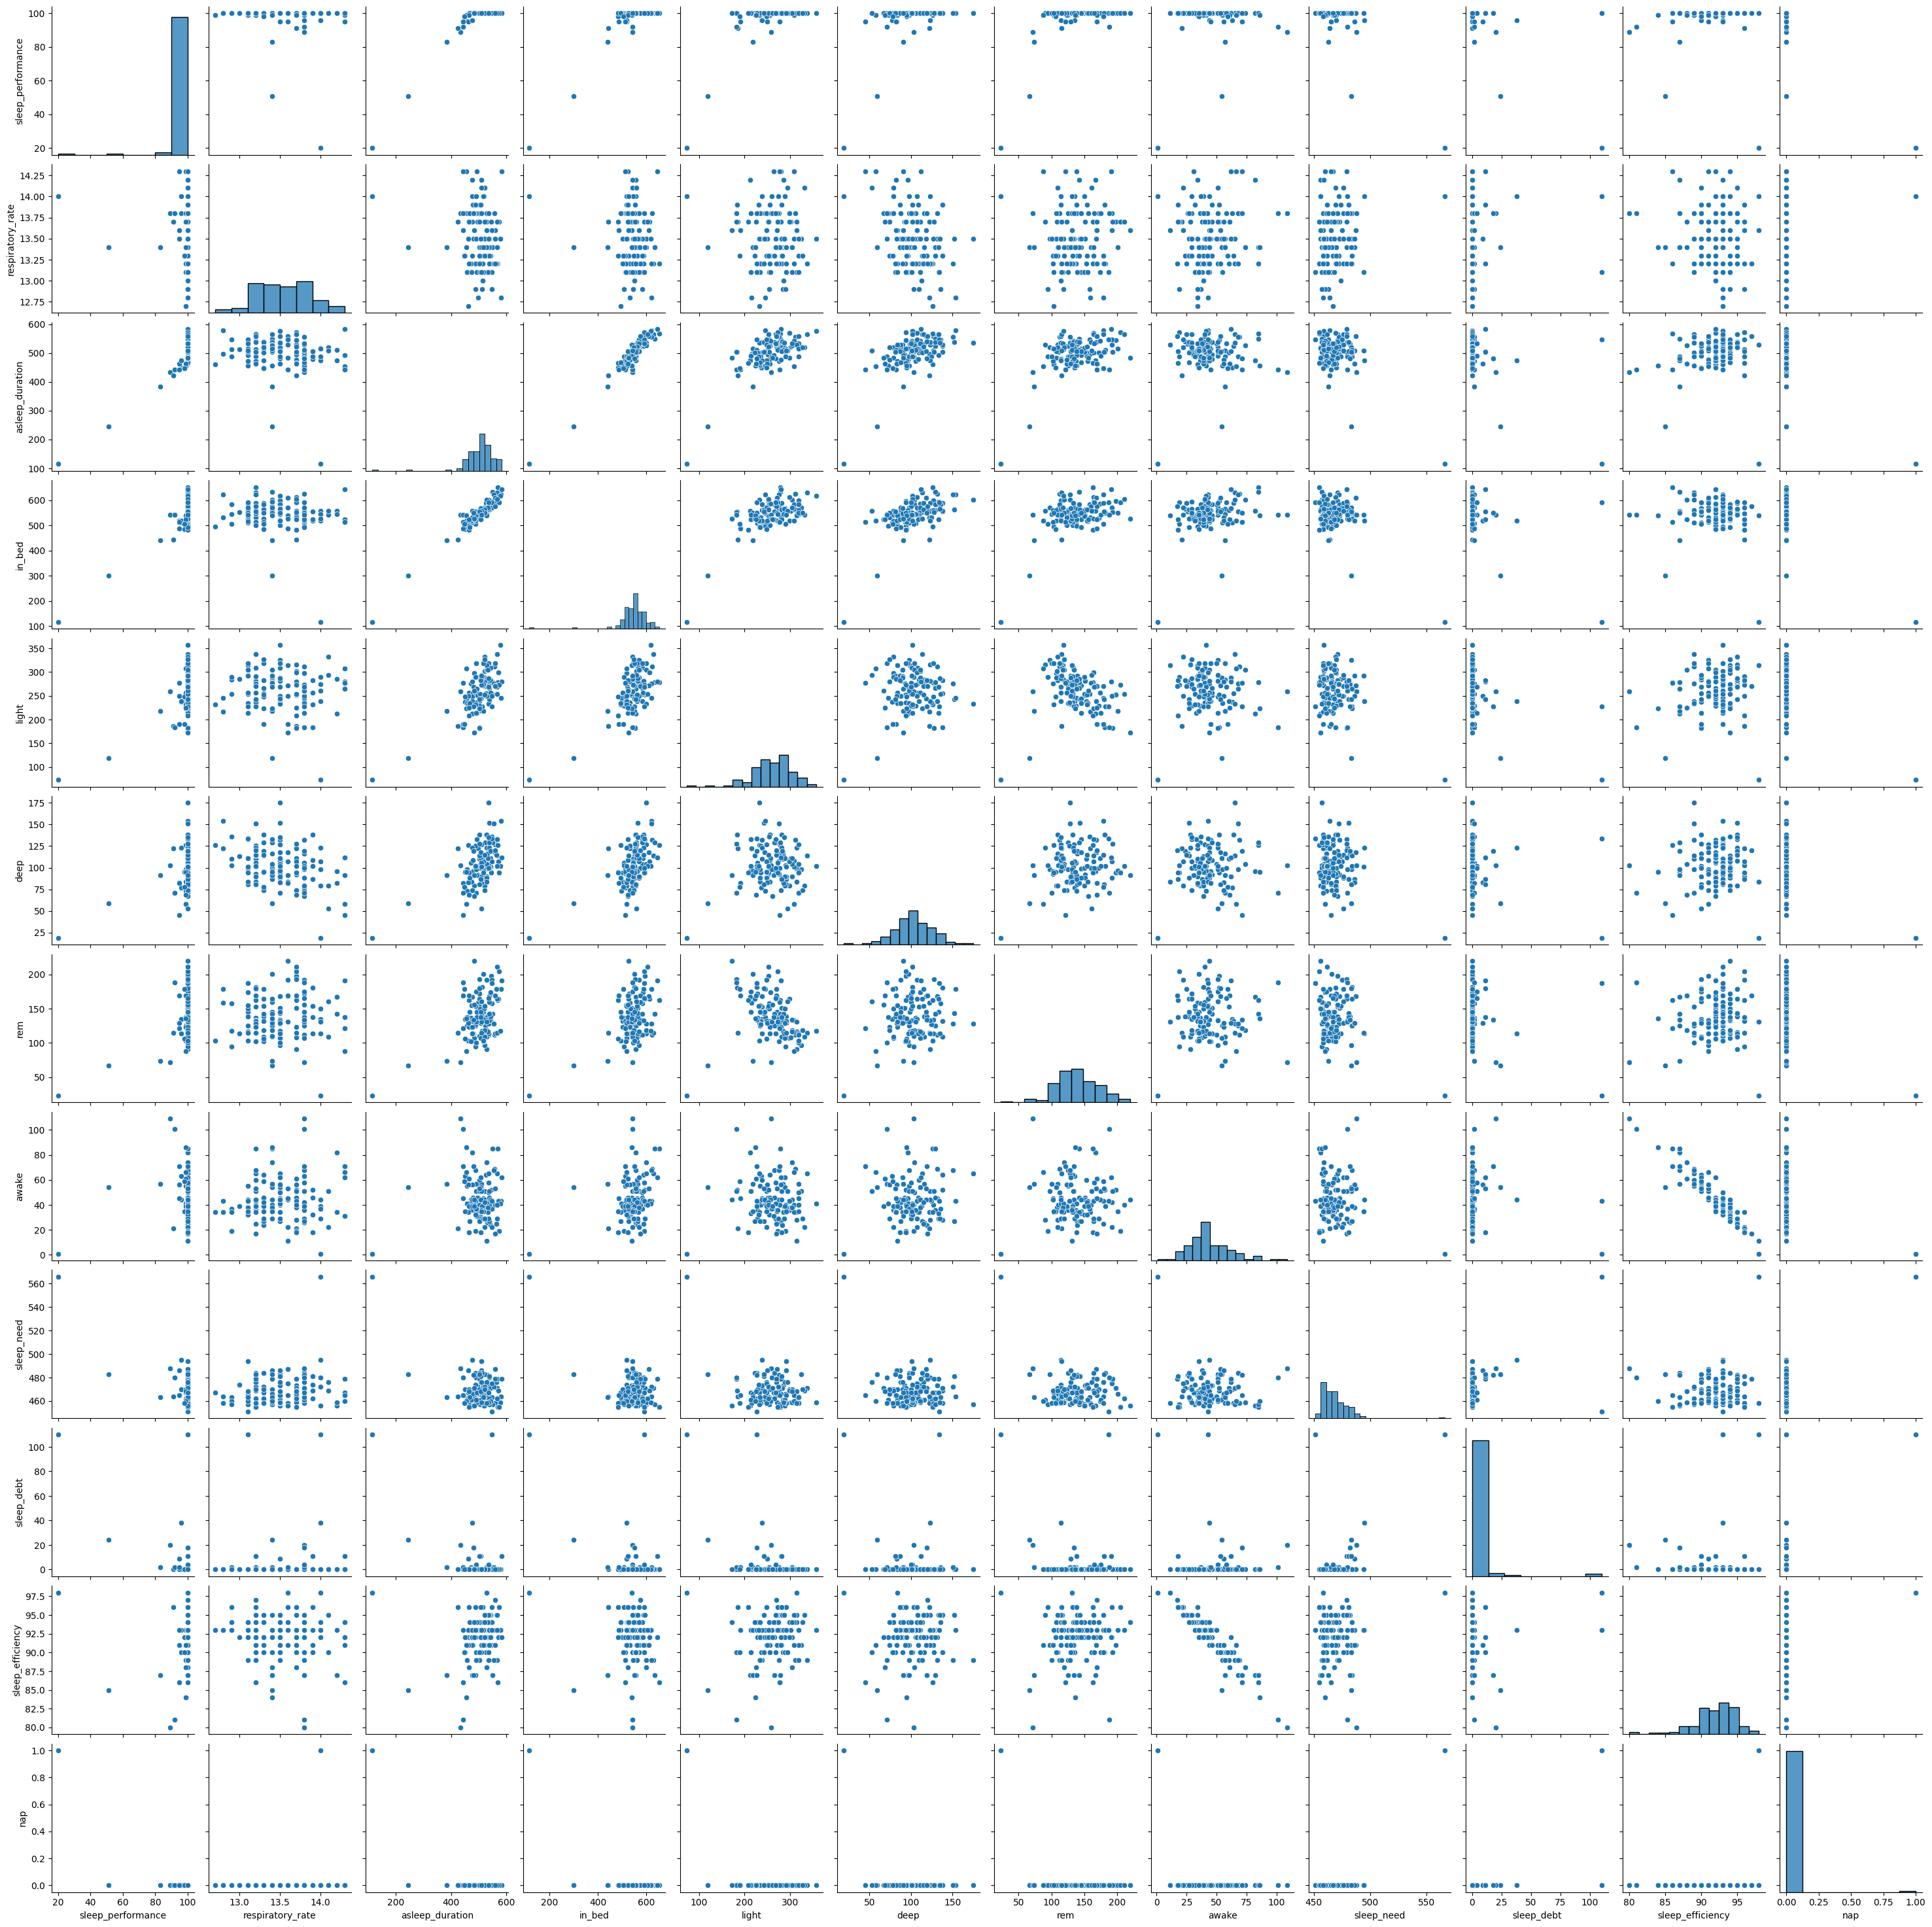

In [35]:
sns.pairplot(df)

/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_94015/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

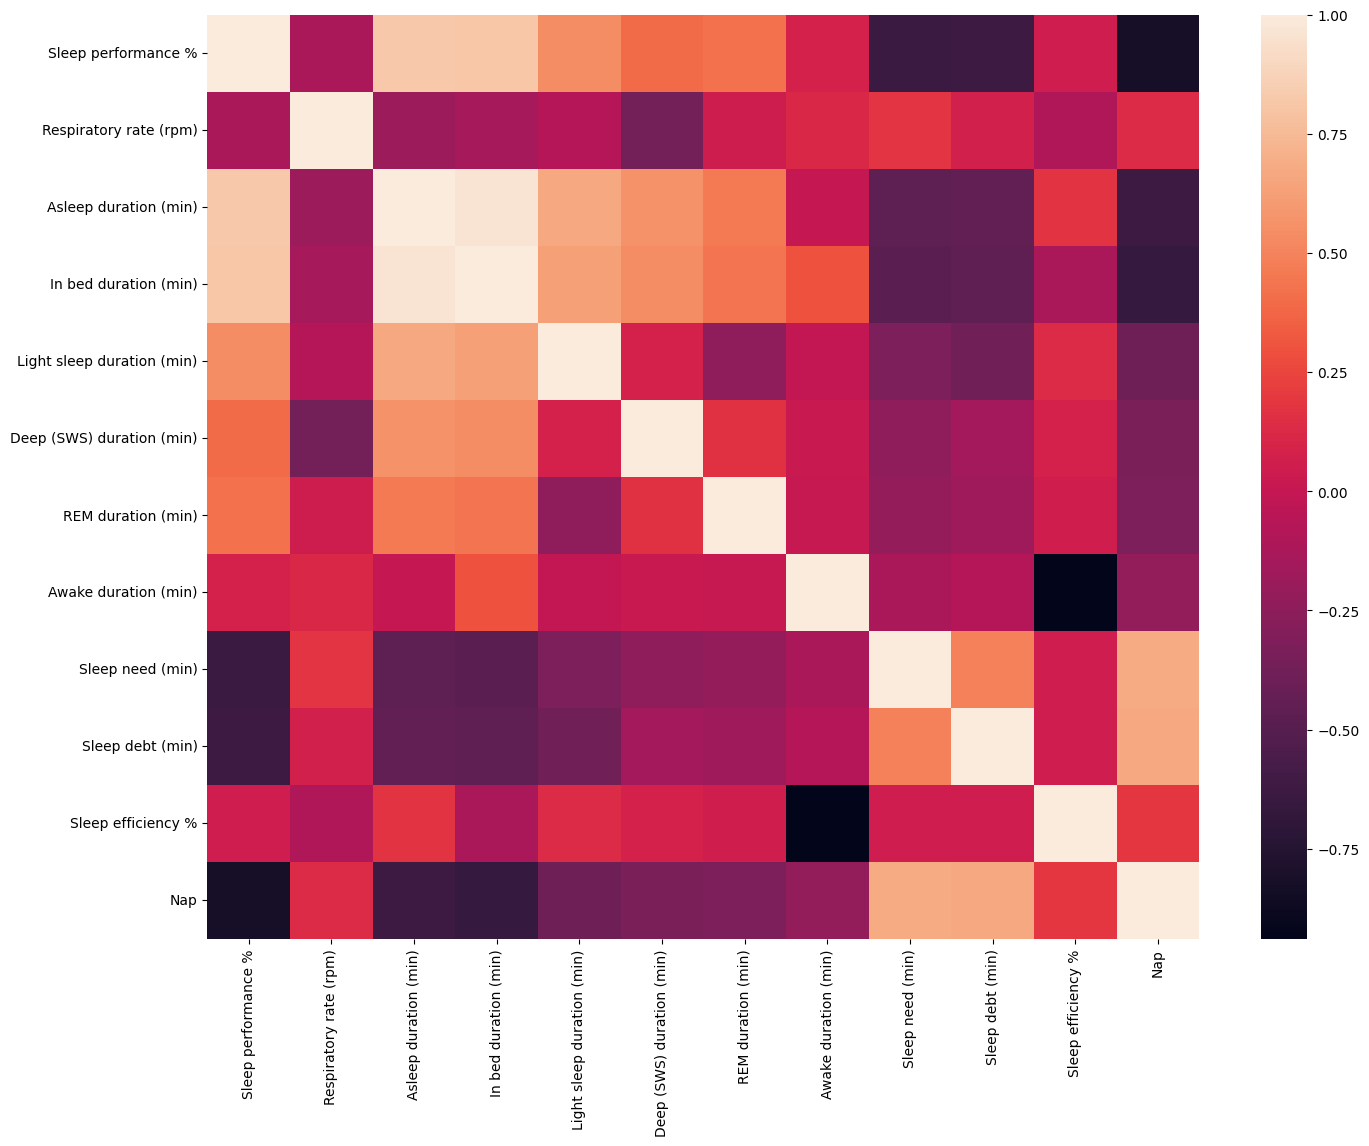

In [47]:
sns.heatmap(df.corr())

In [18]:
# rename columns to make them script-friendly
df_renamed = df.rename(columns=renameColumns(df.columns[9:13]))


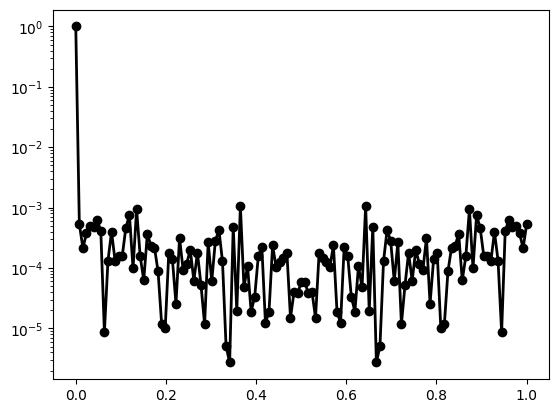

In [12]:
fftPlot(df_renamed['light'].values)

In [50]:
decompPlot(df_renamed, 'Sleep debt (min)')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [25]:
DecomposeResults = seasonal_decompose(df_renamed['awake'], model='multiplicative', period=28)
plt.plot(DecomposeResults.trend)
plt.suptitle('awake')

AttributeError: 'NoneType' object has no attribute 'remove'

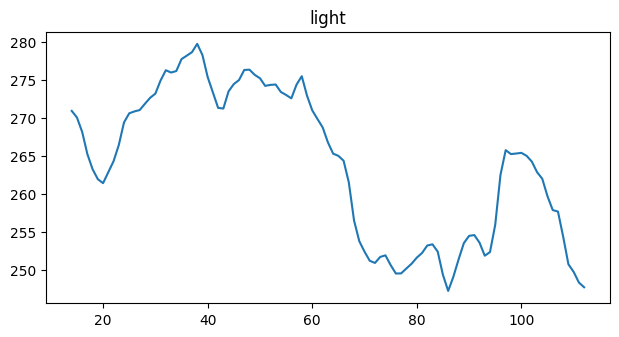

In [40]:
sleepTrendPlot(df_renamed, df_renamed.columns[9:13])

In [44]:
# add new date column only containing month and year
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')

# create dfs for 3 main lifts
squats =  df[df["exercise_name"] == "Squat (Barbell)"]
pullups = df[df["exercise_name"] == "Pull Up"]
dl = df[df["exercise_name"] == "Trap Bar Deadlift"]




                           Date    exercise_name set_order  Weight  Reps  \
month_year                                                                 
2019-06     2019-06-29 07:47:23  Squat (Barbell)         9   185.0  15.0   
2019-07     2019-07-30 11:36:30  Squat (Barbell)         9   195.0  20.0   
2019-08     2019-08-29 11:14:07  Squat (Barbell)         9   185.0  10.0   
2019-09     2019-09-28 10:14:56  Squat (Barbell)         9   185.0  11.0   
2019-10     2019-10-31 11:26:08  Squat (Barbell)         9   185.0  16.0   

            index  
month_year         
2019-06       0.0  
2019-07       1.0  
2019-08       2.0  
2019-09       3.0  
2019-10       4.0  


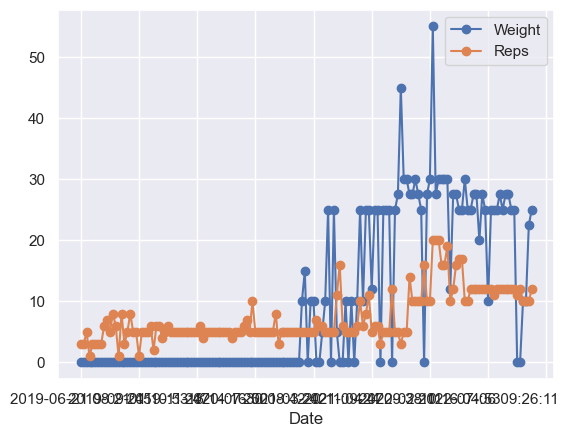

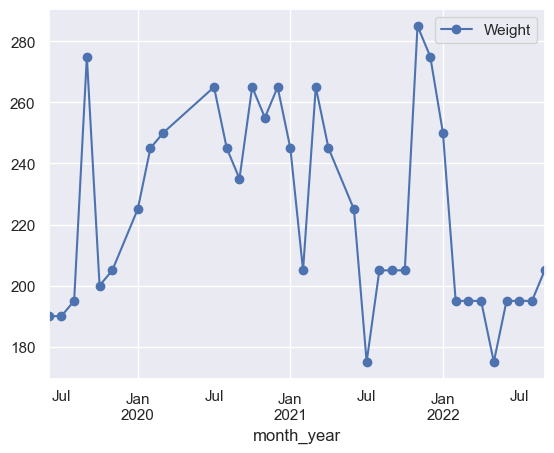

In [45]:
# Look at max reps and weight for pull ups
pullups.groupby("Date").agg(max).plot(y=['Weight','Reps'], marker = 'o')

# create the max for each lift per month
max_squats=squats.groupby("month_year").agg(max)
max_pullups = pullups.groupby("month_year").agg(max)
max_dl=dl.groupby("month_year").agg(max)

max_dl.plot.line(y='Weight', marker = 'o', linestyle = '-')
max_squats['index'] = np.linspace(0,37,38)
print(max_squats.head())



In [47]:
# Now let's look at max volume
squats = df[df["exercise_name"] == "Squat (Barbell)"]
squats['Volume'] = squats['Reps']*squats['Weight']
# print(squats['Volume'].head())






/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_42945/3417345641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squats['Volume'] = squats['Reps']*squats['Weight']


<AxesSubplot: xlabel='Date'>

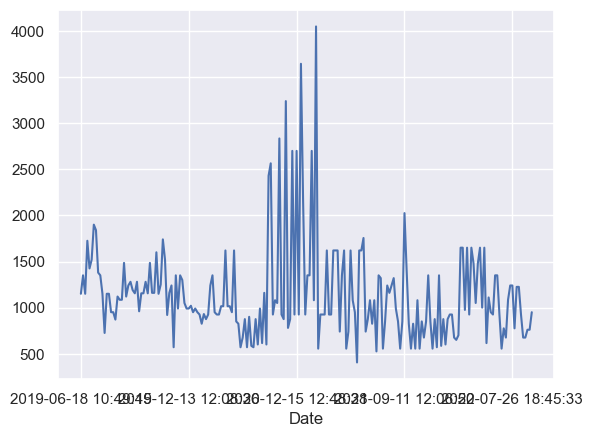

In [51]:
squats.groupby('Date')['Volume'].agg(max).plot()

# I haven't made any progress.. huh?


In [16]:
from d3blocks import D3Blocks
# Initialize
d3 = D3Blocks()

#currently the D3 package seems to have issues

# d3.timeseries(squats, datetime='Date', dt_format='%Y-%m', fontsize=10, figsize=[850, 500])






[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Timeseries]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File not found: [file:////var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/d3blocks/timeseries.html]


/var/folders/nk/cmv723pj6n38_mwnlhj_7z3m0000gp/T/ipykernel_42945/712951197.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = "index", y="Weight",


<AxesSubplot: xlabel='index', ylabel='Weight'>

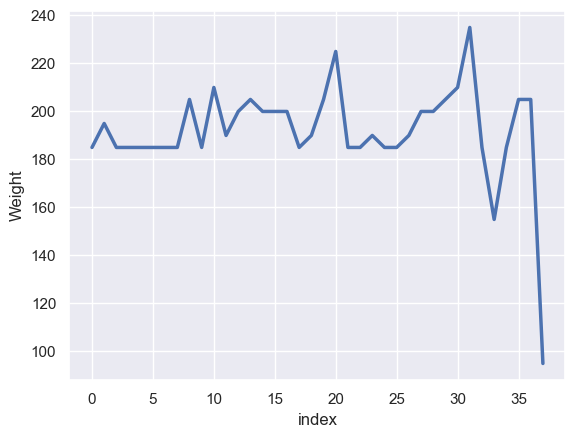

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x = "index", y="Weight",
             data=max_squats,palette="tab10", linewidth=2.5)



In [52]:
max_squats.to_csv('squats_max.csv')



In [54]:
max_pullups.to_csv('pu_max.csv')




In [60]:
max_dl.to_csv('dl_max.csv')

